In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

In [2]:
PATH_POLYP = "results_cv/polyp/"
PATH_FIRE = "results_cv/fire/"
FONTSIZE = 30

In [12]:
polyp_recalls_crc = np.load(PATH_POLYP + "recalls_crc.npy")
polyp_precisions_crc = np.load(PATH_POLYP + "precisions_crc.npy")
polyp_recalls_res = np.load(PATH_POLYP + "recalls_resnet.npy")
polyp_precisions_res = np.load(PATH_POLYP + "precisions_resnet.npy")

fire_recalls_crc = np.load(PATH_FIRE + "intercept_recalls_crc.npy")
fire_precisions_crc = np.load(PATH_FIRE + "intercept_precisions_crc.npy")
fire_recalls_res = np.load(PATH_FIRE + "intercept_recalls_resnet.npy")
fire_precisions_res = np.load(PATH_FIRE + "intercept_precisions_resnet.npy")


In [13]:
np.mean(polyp_recalls_crc, axis=0), np.std(polyp_recalls_crc, axis=0)

(0.8906270469033483, 0.021086952947857902)

In [14]:
np.mean(polyp_recalls_res, axis=0), np.std(polyp_recalls_res, axis=0)

(0.9059768364890753, 0.01837044658278024)

In [15]:
np.mean(polyp_precisions_res), np.mean(polyp_precisions_crc)

(0.45665443325599975, 0.39502339357977967)

In [16]:
np.mean(fire_recalls_crc, axis=0), np.std(fire_recalls_crc, axis=0)

(0.8979408372757643, 0.003406019608521141)

In [17]:
np.mean(fire_recalls_res, axis=0), np.std(fire_recalls_res, axis=0)

(0.901059141971856, 0.028370716157825396)

In [18]:
np.mean(fire_precisions_crc), np.mean(fire_precisions_res)

(0.3627969672827563, 0.4034142496361636)

In [19]:
ttest_ind(fire_precisions_crc, fire_precisions_res, equal_var=False, alternative="less")

TtestResult(statistic=-9.391353890965412, pvalue=1.0426970052652329e-15, df=100.29734760932277)

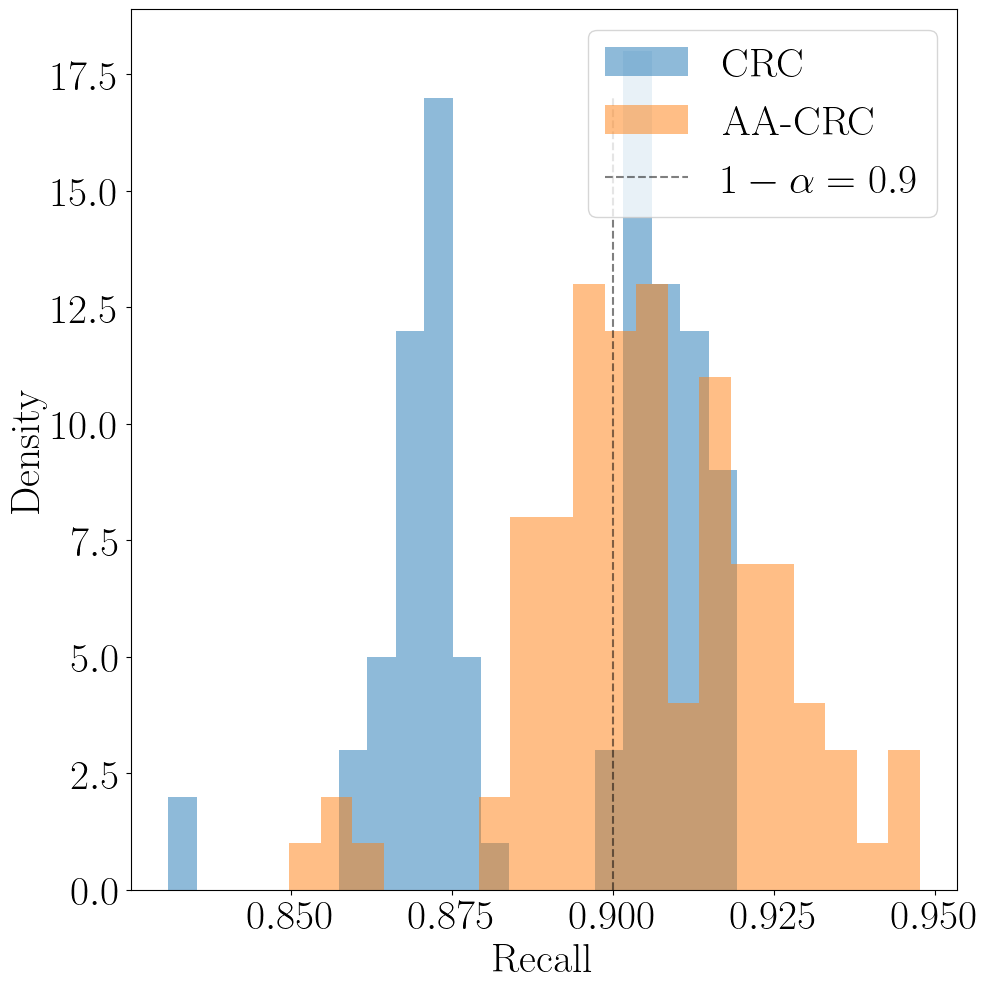

In [20]:
s = 10
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
f, ax = plt.subplots(1, 1, figsize=(s, s))
nbins = 20
# ax.hist(polyp_recalls_crc, bins=nbins, alpha=0.5, label="CRC - Average recall: {:.2f}".format(np.mean(polyp_recalls_crc)))
# ax.hist(polyp_recalls_res, bins=nbins, alpha=0.5, label="MACP - Average recall: {:.2f}".format(np.mean(polyp_recalls_res)))
ax.hist(polyp_recalls_crc, bins=nbins, alpha=0.5, label="CRC")
ax.hist(polyp_recalls_res, bins=nbins, alpha=0.5, label="AA-CRC")
ax.vlines(.9, 0, 17, colors="black", linestyles="dashed", label=r"$1 - \alpha = 0.9$", alpha=.5)
ax.set_xlabel("Recall", fontsize=FONTSIZE)
ax.set_ylabel("Density", fontsize=FONTSIZE)
ax.legend(fontsize=FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
plt.tight_layout()
plt.savefig("results_cv/polyp/polyp_recall_hist.pdf")

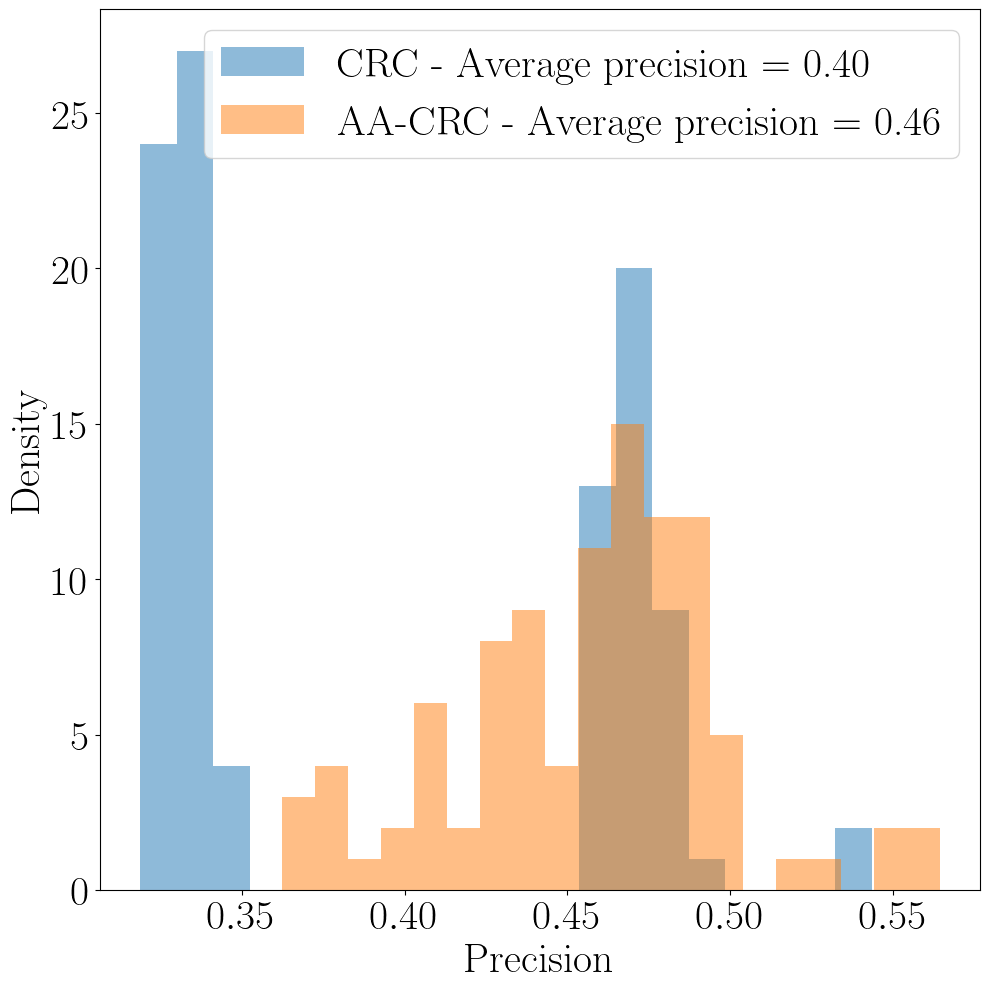

In [21]:
s = 10
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
f, ax = plt.subplots(1, 1, figsize=(s, s))
nbins = 20
ax.hist(polyp_precisions_crc, bins=nbins, alpha=0.5, label=f"CRC - Average precision = {np.mean(polyp_precisions_crc):.2f}")
ax.hist(polyp_precisions_res, bins=nbins, alpha=0.5, label=f"AA-CRC - Average precision = {np.mean(polyp_precisions_res):.2f}")
ax.set_xlabel("Precision", fontsize=FONTSIZE)
ax.set_ylabel("Density", fontsize=FONTSIZE)
ax.legend(fontsize=FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
plt.tight_layout()
plt.savefig("results_cv/polyp/polyp_precision_hist.pdf")

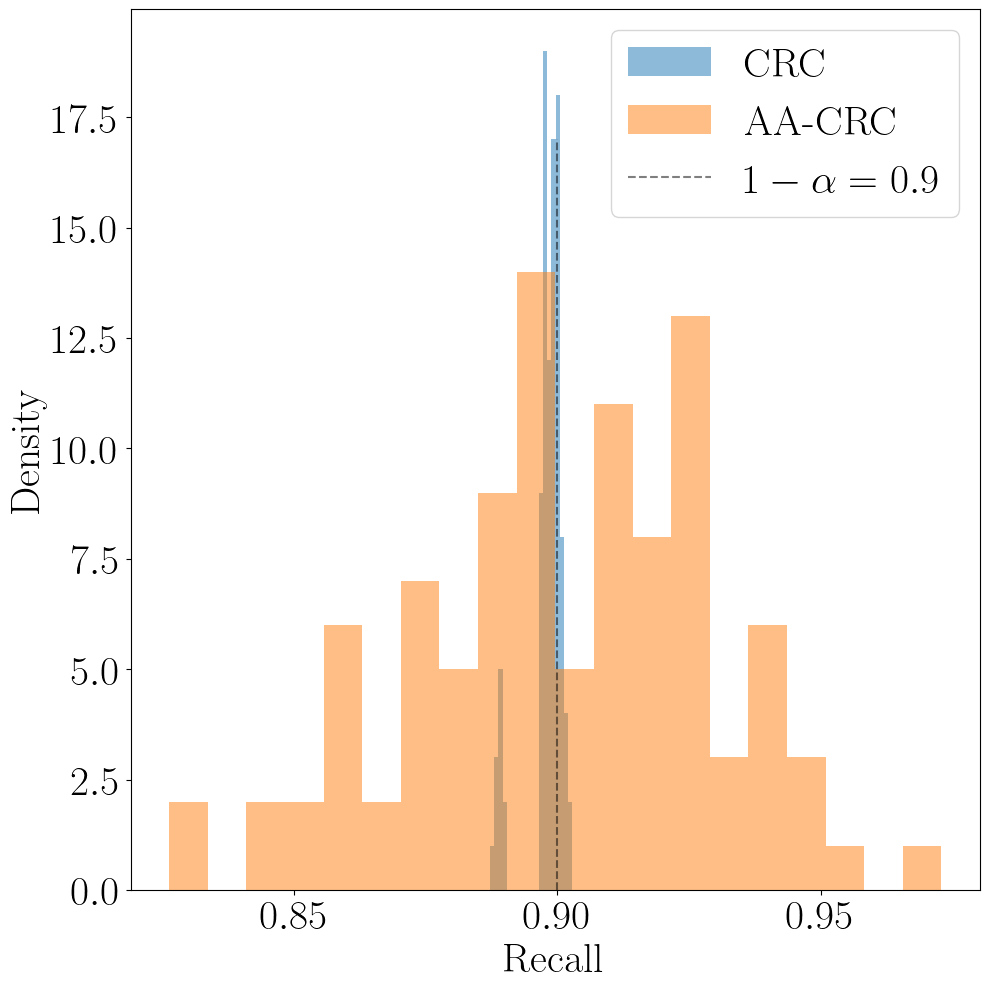

In [22]:
s = 10
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
f, ax = plt.subplots(1, 1, figsize=(s, s))
nbins = 20
# ax.hist(fire_recalls_crc, bins=nbins, alpha=0.5, label="CRC - Average recall: {:.2f}".format(np.mean(fire_recalls_crc)))
# ax.hist(fire_recalls_res, bins=nbins, alpha=0.5, label="MACP - Average recall: {:.2f}".format(np.mean(fire_recalls_res)))
ax.hist(fire_recalls_crc, bins=nbins, alpha=0.5, label="CRC")
ax.hist(fire_recalls_res, bins=nbins, alpha=0.5, label="AA-CRC")
ax.vlines(.9, 0, 17, colors="black", linestyles="dashed", label=r"$1 - \alpha = 0.9$", alpha=.5)
ax.set_xlabel("Recall", fontsize=FONTSIZE)
ax.set_ylabel("Density", fontsize=FONTSIZE)
ax.legend(fontsize=FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)

plt.tight_layout()
plt.savefig("results_cv/fire/fire_recall_hist.pdf")


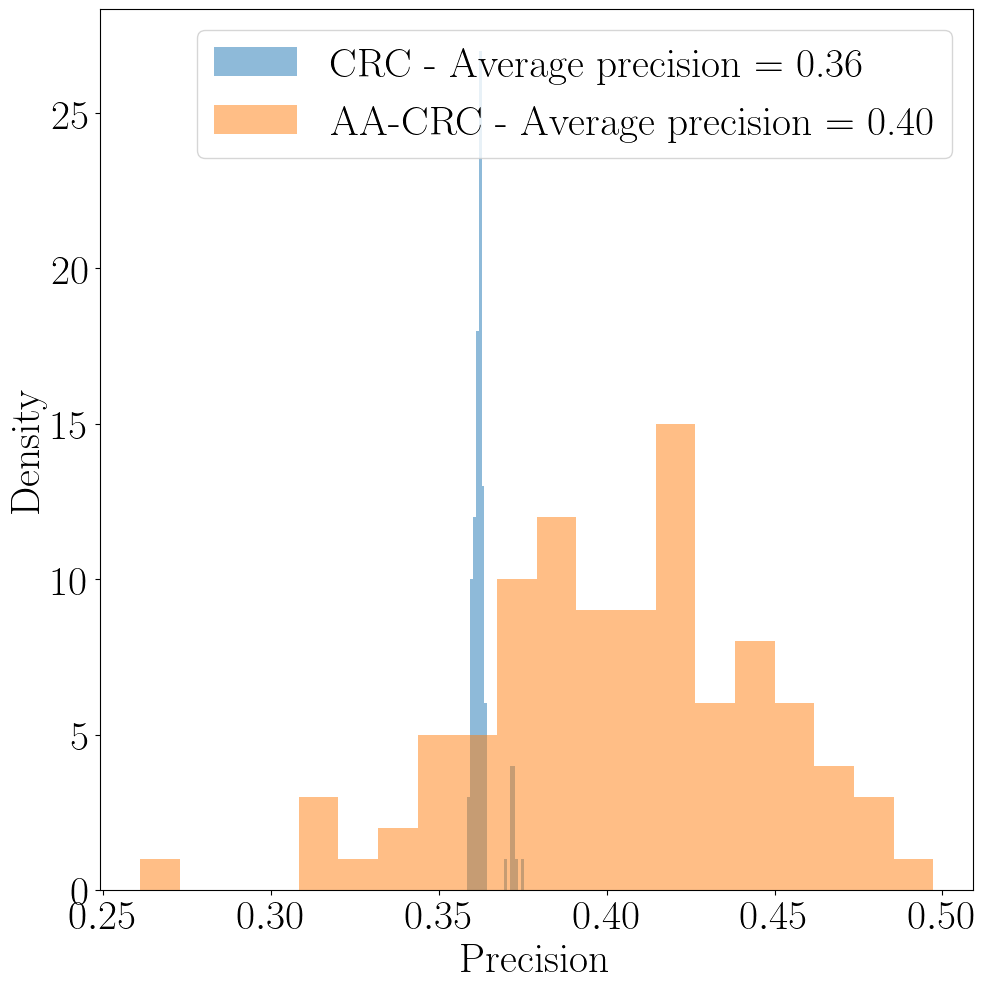

In [23]:
s = 10
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
f, ax = plt.subplots(1, 1, figsize=(s, s))
nbins = 20
ax.hist(fire_precisions_crc, bins=nbins, alpha=0.5, label=f"CRC - Average precision = {np.mean(fire_precisions_crc):.2f}")
ax.hist(fire_precisions_res, bins=nbins, alpha=0.5, label=f"AA-CRC - Average precision = {np.mean(fire_precisions_res):.2f}")
ax.set_xlabel("Precision", fontsize=FONTSIZE)
ax.set_ylabel("Density", fontsize=FONTSIZE)
ax.legend(fontsize=FONTSIZE)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)

plt.tight_layout()
plt.savefig("results_cv/fire/fire_precision_hist.pdf")


In [15]:
len(os.listdir("/home/vblot/multiaccurate_cp/data/fire/02_prepared_data/train/images")) + len(os.listdir("/home/vblot/multiaccurate_cp/data/fire/02_prepared_data/res/images"))

11671

In [16]:
len(os.listdir("/home/vblot/multiaccurate_cp/data/fire/02_prepared_data/cal/images")) 

3432

In [17]:
len(os.listdir("/home/vblot/multiaccurate_cp/data/fire/02_prepared_data/test/images")) 

6865